In [1]:
%pylab inline
import rlcompleter, readline
readline.parse_and_bind('tab: complete')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy
import scipy.io.wavfile
import pylab
import matplotlib

# Computes the Short-Time Fourier Transform (STFT) of a signal, with a given
# window length, and shift between adjacent windows
def stft(x, window_len=4096, window_shift=2048):
	w = scipy.hamming(window_len)
	X = scipy.array([scipy.fft(w*x[i:i+window_len])
		for i in range(0, len(x)-window_len, window_shift)])
	return scipy.absolute(X[:,0:window_len/2])
#stft return a 2-D signal. x-axis is time parameter, y frequency 
#and the value is the amplitude(means volume in audio case)

In [89]:
if __name__ == '__main__':
    rate, data = scipy.io.wavfile.read('../tracks/1.wav')
# Strip out the stereo channel if present
    if(len(data.shape) > 1):
        data = data[:,0]

# Get just the first 10 seconds as our audio signal
x = data[0:10*rate]
X = stft(x)
#spectrogram is 3-D graph, x-axis time, y-axis frequency, color amplitude
def plot_transform(X):
	pylab.ion()
	pylab.figure()
	pylab.imshow(scipy.log(X.T), origin='lower', aspect='auto', interpolation='nearest', norm=matplotlib.colors.Normalize())
#	pylab.xlabel('Window index')
#	pylab.ylabel('Transform coefficient')
	pylab.ioff()
    
def plot_peaks(peak_list,start,end):
    fig = matplotlib.pyplot.figure()
    ax = fig.add_subplot(1,1,1)    
    s_list, f_list = zip(*peak_list)    
    matplotlib.pyplot.plot(s_list, f_list, 'bo',)
    plt.xticks(range(0,250,20))
    ymin, ymax = ax.get_ylim()    
    ax.vlines((start,end),ymin,ymax,'red')
    matplotlib.pyplot.xlabel('Time')
    matplotlib.pyplot.ylabel('Frequency')

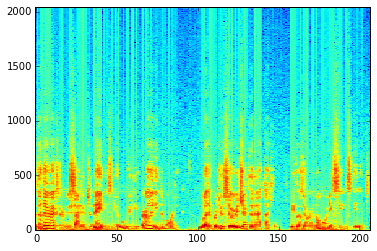

In [90]:
plot_transform(X)

In [123]:
def findPeaks(X,K):
    peaks = []
    for i in range(0,X.shape[0],K):
        for j in range(0,X.shape[1],K): 
            index = np.where(X == X[i:i+K,j:j+K].max())
            peaks.append(index)
    return peaks
peaks = findPeaks(X,20)


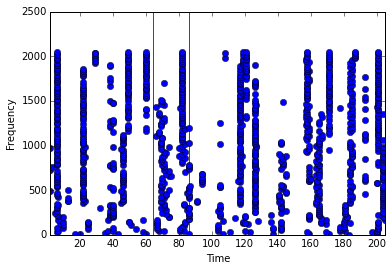

In [124]:
plot_peaks(peaks,3.07*(rate/2048),4.11*(rate/2048))

In [236]:
def hash_table(T,F,N,peaks):
    target_zone = []
    hashTable = {}
    for each in peaks:
        (t1,f1) = each
        target_zone = [(x,y) for x,y in peaks if x>t1 and x<t1+T and y>f1-F and y<f1+F]
#print target_zone[1]
        for each in target_zone[:N]:
            (t2,f2) = each
            t1 = int(t1)
            t2 = int(t2)
            f1 = int(f1)
            f2 = int(f2)
            hash_value = hash((f1+f2+(t2-t1))+t1)
            hashTable[hash_value] = t1
    return hashTable
hashTable = hash_table(40,2000,90,peaks)

In [193]:
if __name__ == '__main__':
    rate, data = scipy.io.wavfile.read('../tracks/1.wav')
# Strip out the stereo channel if present
    if(len(data.shape) > 1):
        data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio1 = data[0:10*rate]
X1 = stft(audio1)
rate, data = scipy.io.wavfile.read('../tracks/2.wav')
# Strip out the stereo channel if present
if(len(data.shape) > 1):
    data = data[:,0]

# Get just the first 10 seconds as our audio signal
audio2 = data[0:10*rate]
X2= stft(audio2)



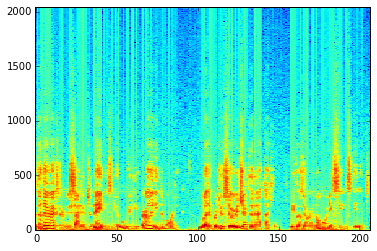

In [194]:
plot_transform(X1)

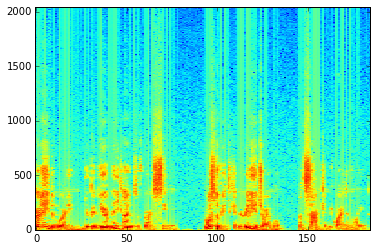

In [195]:
plot_transform(X2)

In [237]:
peaks1 = findPeaks(X1,20)
peaks2 = findPeaks(X2,20)

In [238]:
hashtable1 = hash_table(40,2000,90,peaks1)

In [239]:
hashtable2 = hash_table(40,2000,90,peaks2)

In [240]:
common_values = set(hashtable1.keys()) & set(hashtable2.keys())

In [241]:
print len(common_values)

3747


In [242]:
common_values = sorted(common_values)

In [246]:
print len(hashtable2)

3825


In [247]:
pairs = []
for each in common_values:
    t1 = hashtable1[each]
    t2 = hashtable2[each]
    pairs.append([t1,t2])

In [248]:
print len(pairs)

3747


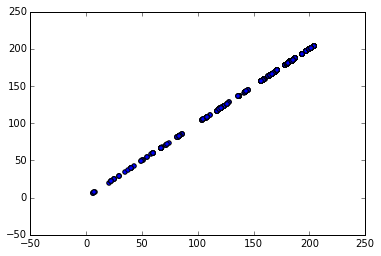

In [251]:
plt.scatter([t1 for [t1,t2] in pairs],[t1 for [t1,t2] in pairs])